# Распознавание цифр с помощью LeNet

![alt text](https://engmrk.com/wp-content/uploads/2018/09/LeNet_Original_Image.jpg)

![alt text](https://engmrk.com/wp-content/uploads/2018/09/LeNEt_Summary_Table.jpg)

In [24]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [25]:
import torchvision.datasets

In [26]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)


In [27]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/home/rv/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/rv/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/rv/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/rv/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [28]:
len(y_train), len(y_test)

(60000, 10000)

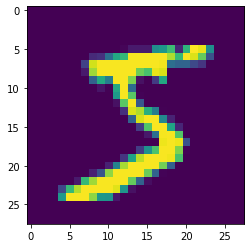

tensor(5)


In [29]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [30]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [31]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [33]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.Tanh()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.Tanh()
        
        self.fc3   = torch.nn.Linear(84, 10)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
lenet5 = LeNet5()

In [34]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

In [35]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [37]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
    order = np.random.permutation(len(X_train))
    
    train_batch_loss_history =[]
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = lenet5.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        
        optimizer.step()
        
    test_preds = lenet5.forward(X_test)
    test_loss_history.append(np.array(train_batch_loss_history).mean())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print(accuracy)

tensor(0.9842)
tensor(0.9847)
tensor(0.9863)
tensor(0.9865)
tensor(0.9867)
tensor(0.9865)
tensor(0.9905)
tensor(0.9875)
tensor(0.9857)
tensor(0.9857)
tensor(0.9909)
tensor(0.9886)
tensor(0.9890)
tensor(0.9889)
tensor(0.9892)
tensor(0.9881)
tensor(0.9896)
tensor(0.9887)
tensor(0.9897)


KeyboardInterrupt: 

In [38]:
lenet5.forward(X_test)

tensor([[-2.8586, -1.3968,  0.3911,  ..., 16.4490, -4.9228,  3.3498],
        [ 2.1235,  4.5647, 15.4968,  ..., -3.4524, -0.6449, -5.9899],
        [-2.6322, 15.3628,  1.8565,  ...,  1.2414,  1.1317, -6.2501],
        ...,
        [-5.7542, -1.5687, -4.0903,  ...,  0.4250,  0.1015,  2.7029],
        [ 4.2324, -2.1821, -4.9160,  ..., -7.9081,  5.2591, -4.9632],
        [ 1.3615, -4.7592,  3.5688,  ..., -8.5364,  0.0699, -5.1838]],
       grad_fn=<AddmmBackward>)

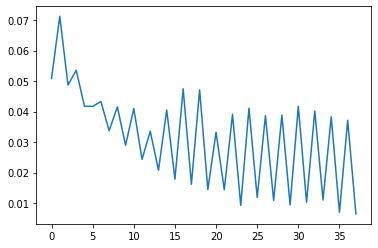

In [41]:
# plt.plot(test_accuracy_history);
plt.plot(test_loss_history);
plt.plot(train_loss_history);

In [42]:
train_loss_history

[]